<a href="https://colab.research.google.com/github/Amaliaaap/Decision-Tree/blob/main/Drug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DRUG 200**


 Pemilihan dataset *drug* daripada *red wine quality* dan *heart* karena memiliki relevansi praktis tinggi dalam kesehatan, terutama dalam klasifikasi obat yang sesuai berdasarkan usia, jenis kelamin, tekanan darah, kolesterol, dan rasio natrium-kalium. Variabel-variabel ini lebih beragam dan memungkinkan analisis prediktif yang lebih akurat dengan teknik *Machine Learning*. Selain itu, hasil analisis *drug* memiliki dampak sosial yang lebih besar, mendukung pengambilan keputusan medis dan kebijakan kesehatan. Secara keseluruhan, dataset drug memberikan nilai lebih dalam aplikasi dunia nyata dibandingkan dengan dataset lainnya.

# IMPORT LIBRARY

In [173]:
!pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# DATA

In [174]:
df = pd.read_csv('/content/drive/MyDrive/Data Mining/drug200.csv')

In [175]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


# Exploratory Data Analysis

In [176]:
# Memeriksa apakah ada missing value
df.isnull().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


Dari hasil di atas, tidak ada nilai yang hilang/null dalam dataset ini

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


# Visualisasi Data

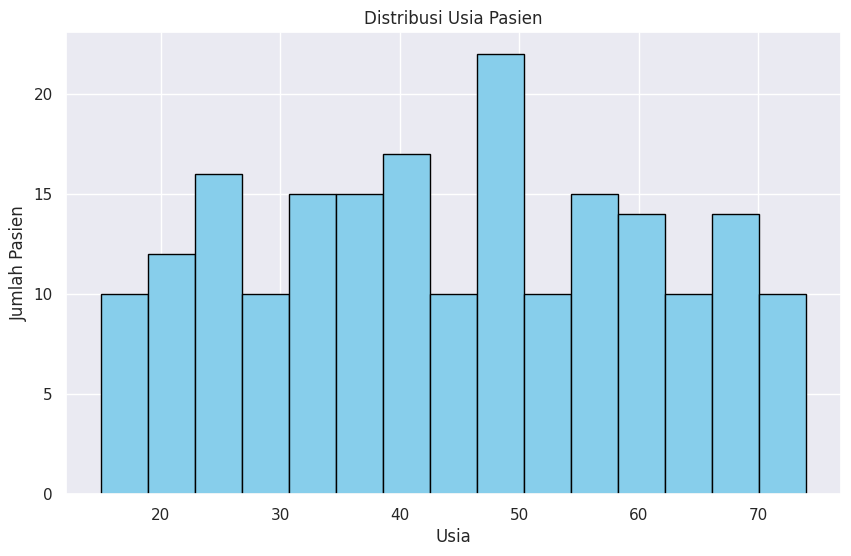

In [178]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=15, color='skyblue', edgecolor='black')
plt.xlabel('Usia')
plt.ylabel('Jumlah Pasien')
plt.title('Distribusi Usia Pasien')

plt.show()

<ipython-input-179-dfca3589a375>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sex", data=df, palette="rocket")


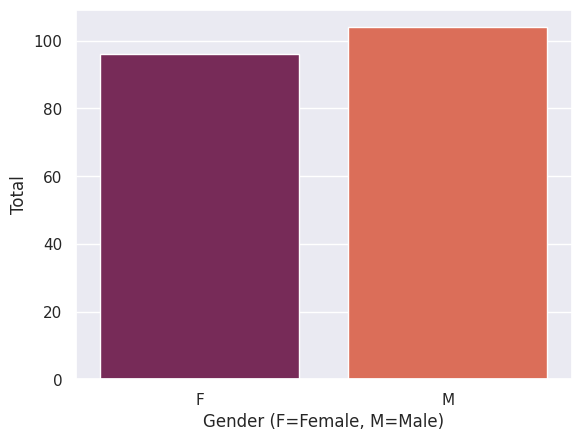

In [179]:
sns.set_theme(style="darkgrid")
sns.countplot(x="Sex", data=df, palette="rocket")
plt.xlabel('Gender (F=Female, M=Male)')
plt.ylabel('Total')
plt.show()

Sex
M    104
F     96
Name: count, dtype: int64


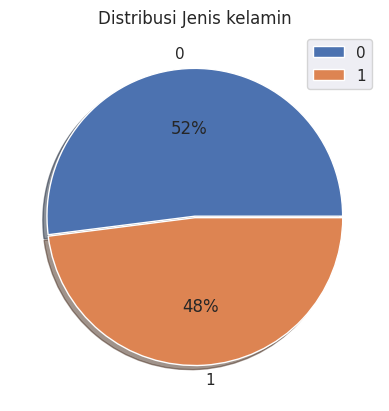

In [180]:
tar = df['Sex'].value_counts()
print(tar)

plt.pie(tar, labels=[0, 1], explode=[0, 0.01], autopct='%.f%%', shadow=True)
plt.title('Distribusi Jenis kelamin')
plt.legend()
plt.show()

Distribusi jenis kelamin pasien seimbang.

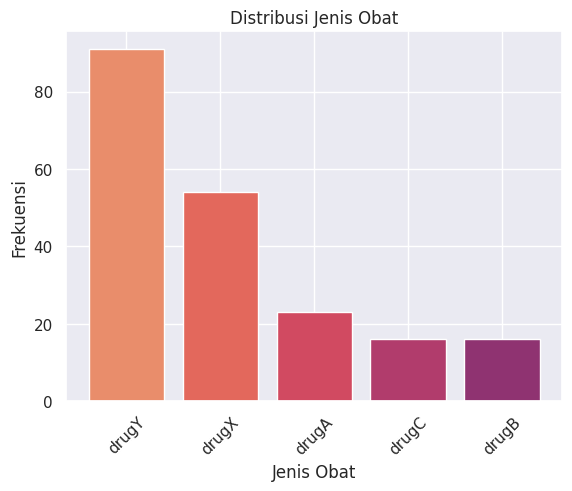

In [181]:
# Menghitung frekuensi setiap jenis obat
counts = df['Drug'].value_counts()

sns.set_palette("flare")
plt.bar(counts.index, counts, color=sns.color_palette())
plt.xlabel('Jenis Obat')
plt.ylabel('Frekuensi')
plt.title('Distribusi Jenis Obat')
plt.xticks(rotation=45)
plt.show()

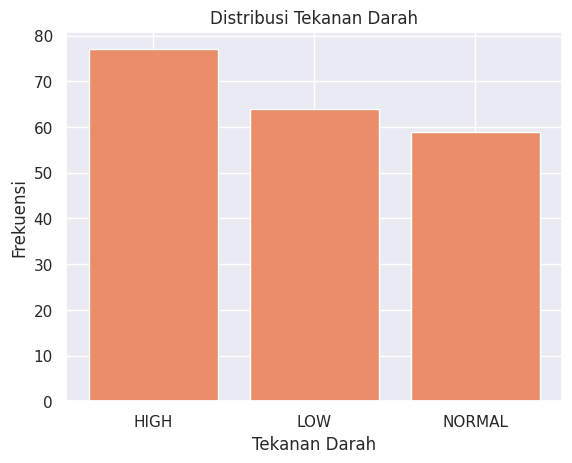

In [182]:
# Menghitung frekuensi setiap jenis obat
counts = df['BP'].value_counts()

# Membuat histogram
plt.bar(counts.index, counts)
plt.xlabel('Tekanan Darah')
plt.ylabel('Frekuensi')
plt.title('Distribusi Tekanan Darah')
plt.show()

<ipython-input-183-df5a800a4968>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cholesterol', data=df, palette='crest')


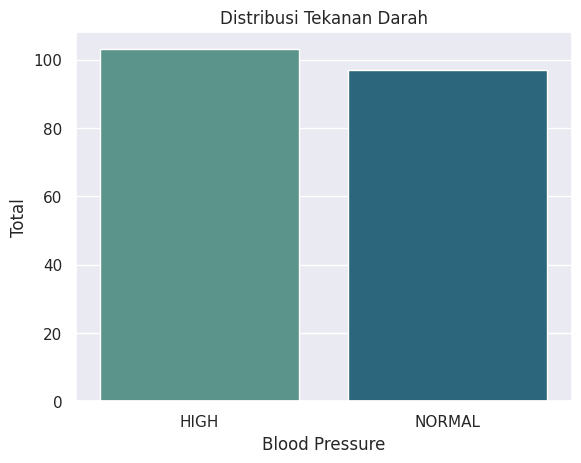

In [183]:
sns.set_theme(style='darkgrid')
sns.countplot(x='Cholesterol', data=df, palette='crest')
plt.xlabel('Blood Pressure')
plt.ylabel('Total')
plt.title('Distribusi Tekanan Darah')
plt.show()

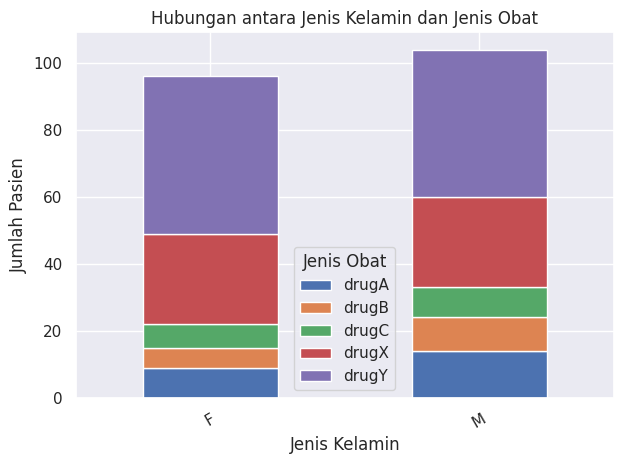

In [184]:
# Menghitung  jumlah pasien untuk setiap kombinasi Blood Pressure, Cholesterol, dan Drug Type
grouped = df.groupby(['Sex', 'Drug']).size().unstack(fill_value=0)

# Membuat stacked bar plot
grouped.plot(kind='bar', stacked=True)

# Menambahkan label dan judul
plt.title('Hubungan antara Jenis Kelamin dan Jenis Obat')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah Pasien')
plt.xticks(rotation=30)

# Menampilkan legend
plt.legend(title='Jenis Obat')

# Menampilkan plot
plt.tight_layout()
plt.show()


In [185]:
df['Age'].describe()

,Age
count,200.000000
mean,44.315000
std,16.544315
min,15.000000
25%,31.000000
50%,45.000000
75%,58.000000
max,74.000000


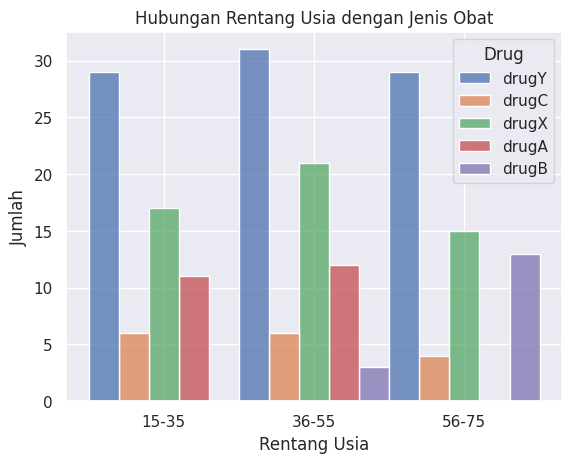

In [186]:
# Membuat kolom rentang usia
bins = [15, 35, 55, 75]
labels = ['15-35', '36-55', '56-75']
df['rentang_usia'] = pd.cut(df['Age'], bins=bins, labels=labels)

sns.histplot(data=df, x='rentang_usia', hue='Drug', multiple='dodge')
plt.title('Hubungan Rentang Usia dengan Jenis Obat')
plt.xlabel('Rentang Usia')
plt.ylabel('Jumlah')
plt.show()

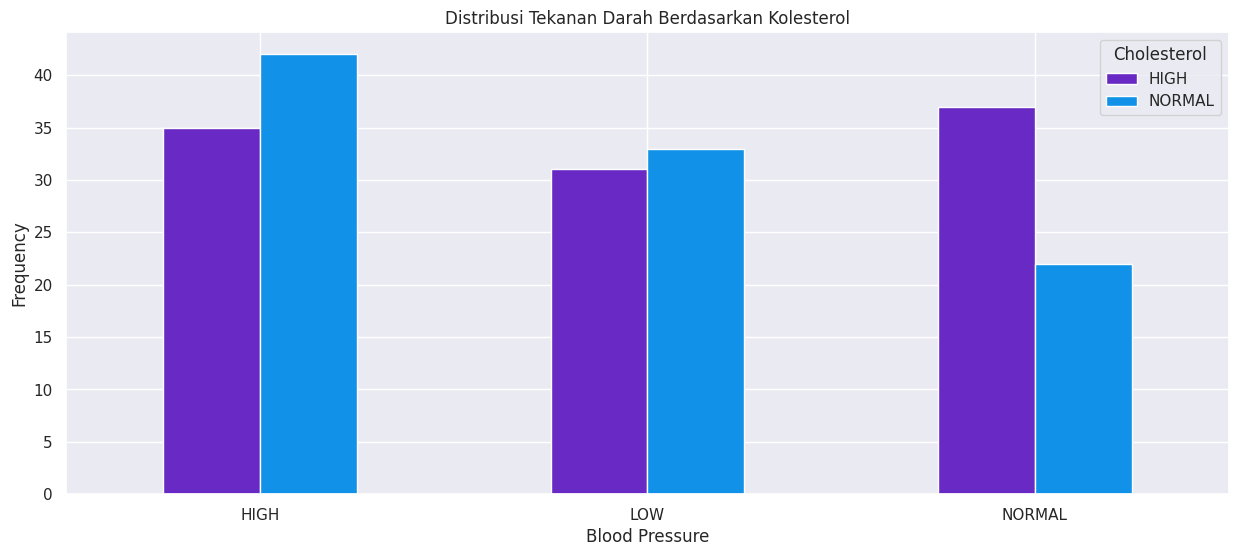

In [187]:
pd.crosstab(df.BP,df.Cholesterol).plot(kind="bar",figsize=(15,6),color=['#6929c4','#1192e8'])
plt.title('Distribusi Tekanan Darah Berdasarkan Kolesterol')
plt.xlabel('Blood Pressure')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

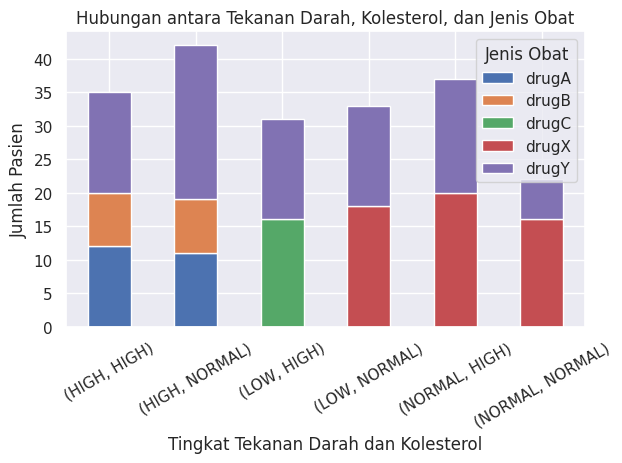

In [188]:
# Menghitung  jumlah pasien untuk setiap kombinasi Blood Pressure, Cholesterol, dan Drug Type
grouped = df.groupby(['BP', 'Cholesterol', 'Drug']).size().unstack(fill_value=0)

# Membuat stacked bar plot
grouped.plot(kind='bar', stacked=True)

# Menambahkan label dan judul
plt.title('Hubungan antara Tekanan Darah, Kolesterol, dan Jenis Obat')
plt.xlabel('Tingkat Tekanan Darah dan Kolesterol')
plt.ylabel('Jumlah Pasien')
plt.xticks(rotation=30)

# Menampilkan legend
plt.legend(title='Jenis Obat')

# Menampilkan plot
plt.tight_layout()
plt.show()


# Dataset Preparation

In [205]:
# Mengubah variabel kategorik menjadi numerik
enc = LabelEncoder()

df['Sex']= enc.fit_transform(df['Sex'].values)
df['BP']= enc.fit_transform(df['BP'].values)
df['Cholesterol']= enc.fit_transform(df['Cholesterol'].values)

df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY


Membagi dataset

In [206]:
# Menentukan set fitur dan variabel target
x = df.drop(['Drug'], axis=1)
y = df['Drug']

#menghapus kolom rentang usia
df = df.drop(['rentang_usia'], axis=1)

KeyError: "['rentang_usia'] not found in axis"

In [263]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.35, random_state = 0)

x_train.shape, x_test.shape

((130, 5), (70, 5))

Rekayasa Fitur

mengubah variabel kategoris menjadi bentuk yang dapat diberikan kepada algoritma ML untuk melakukan prediksi yang lebih baik.

In [264]:
x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)

In [265]:
x_train.head()

,Age,Sex,BP,Cholesterol,Na_to_K
139,69,0,2,0,10.065
90,62,1,2,0,16.594
137,35,0,0,0,12.894
101,45,0,0,0,12.854
144,39,1,0,0,9.664


In [266]:
x_test.head()

,Age,Sex,BP,Cholesterol,Na_to_K
18,23,1,1,0,7.298
170,28,0,2,0,12.879
107,42,1,1,0,20.013
98,20,1,0,1,35.639
177,25,1,2,0,19.011


Teknik SMOTE

Karena jumlah 'DrugY' lebih banyak dibandingkan jenis obat lainnya, maka dilakukan oversampling untuk menghindari overfitting.

In [267]:
from imblearn.over_sampling import SMOTE
x_train, y_train = SMOTE().fit_resample(x_train, y_train)

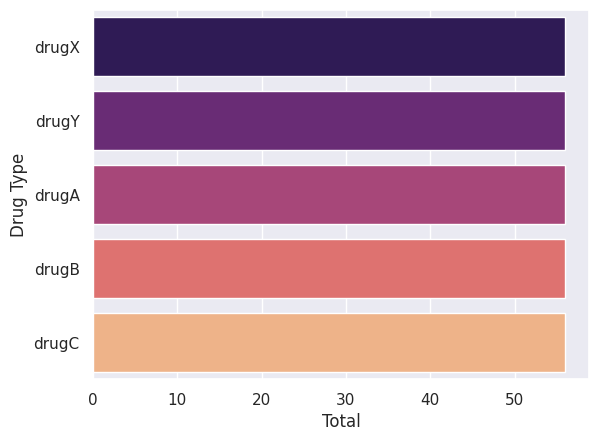

In [268]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y_train, hue=y_train, palette="magma", legend=False)
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

Seperti yang dapat dilihat, distribusi jenis obat tidak seimbang.

# MODEL

In [269]:
from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier(max_leaf_nodes=20)
DTclassifier.fit(x_train, y_train)

y_pred = DTclassifier.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         5
       drugB       1.00      1.00      1.00         4
       drugC       1.00      0.50      0.67         4
       drugX       0.91      0.95      0.93        22
       drugY       0.97      1.00      0.99        35

    accuracy                           0.96        70
   macro avg       0.98      0.89      0.92        70
weighted avg       0.96      0.96      0.95        70

[[ 5  0  0  0  0]
 [ 0  4  0  0  0]
 [ 0  0  2  2  0]
 [ 0  0  0 21  1]
 [ 0  0  0  0 35]]


In [270]:
from sklearn.metrics import accuracy_score
DTAcc = accuracy_score(y_pred,y_test)
print('Decision Tree accuracy is: {:.2f}%'.format(DTAcc*100))

Decision Tree accuracy is: 95.71%


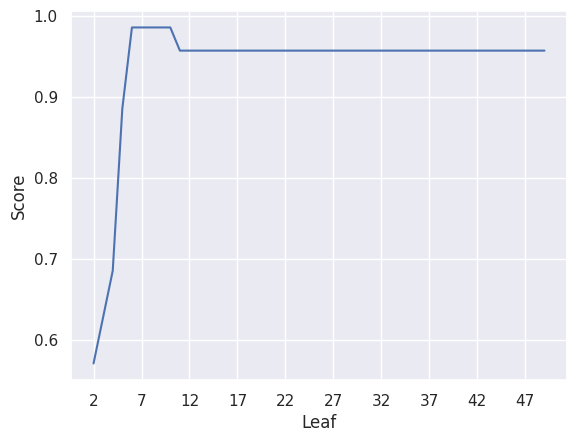

DT Acc Max 98.57%


In [275]:
scoreListDT = []
for i in range(2,50):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(x_train, y_train)
    scoreListDT.append(DTclassifier.score(x_test, y_test))

plt.plot(range(2,50), scoreListDT)
plt.xticks(np.arange(2,50,5))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAccMax = max(scoreListDT)
print("DT Acc Max {:.2f}%".format(DTAccMax*100))

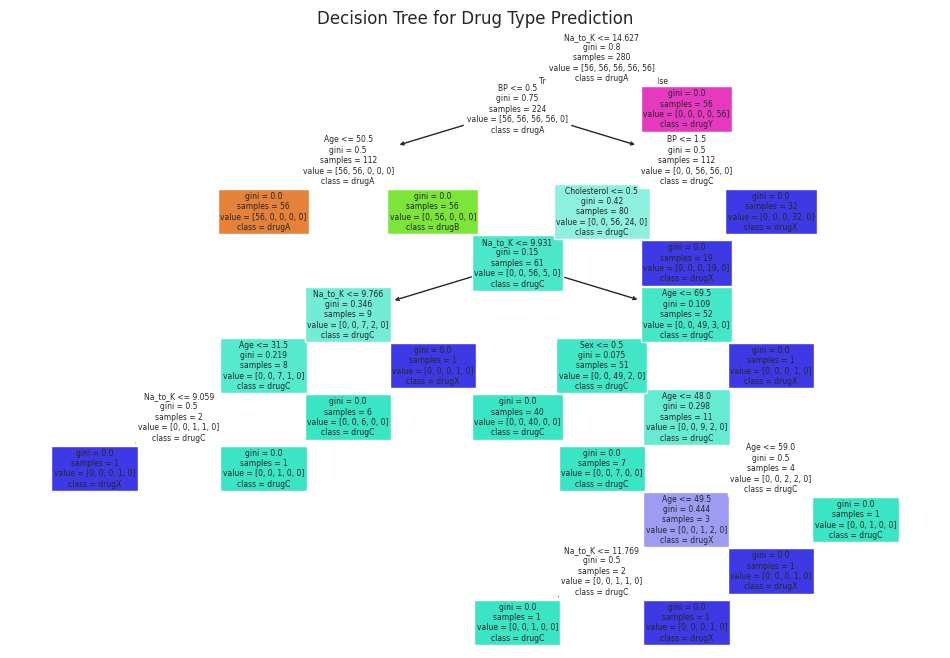

In [276]:
# Visualize the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(DTclassifier, feature_names=x.columns, class_names=clf.classes_, filled=True)
plt.title("Decision Tree for Drug Type Prediction")
plt.show()